## Day 25 Lecture 2 Assignment

In this assignment, we will extend a previous binary model to a multinomial case with three classes. We will use the FIFA soccer ratings dataset loaded below and analyze the model generated for this dataset.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def remove_correlated_features(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [4]:
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [5]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


Our response for our logistic regression model is going to be a new column, "RankingTier", that contains three categories:

- High: Overall score > 75
- Middle: Overall score between 65 and 75
- Low: Overall score < 65

In [6]:
# answer goes here
soccer_data['RankingTier'] = np.where(soccer_data['Overall'] > 75, 'High', 
                                      np.where(soccer_data['Overall'] < 65, 'Low', 'Middle'))
soccer_data

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,RankingTier
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,48,22,94,94,75,96,33,28,26,High
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,63,29,95,82,85,95,28,31,23,High
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,56,36,89,87,81,94,27,24,33,High
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,76,61,87,94,79,88,68,58,51,High
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,54,41,87,89,86,91,34,27,22,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,238813,J. Lundstram,47,34,38,40,49,25,42,30,...,46,46,39,52,43,45,40,48,47,Low
16118,243165,N. Christoffersson,47,23,52,52,43,36,39,32,...,47,16,46,33,43,42,22,15,19,Low
16119,241638,B. Worman,47,25,40,46,38,38,45,38,...,32,15,48,43,55,41,32,13,11,Low
16120,246268,D. Walker-Rice,47,44,50,39,42,40,51,34,...,33,22,44,47,50,46,20,25,27,Low


The next few steps until model training are the same as before: identify and remove highly correlated features, and split the data into a training set (80%) and a test set (20%).

In [13]:
soccer_data = soccer_data.drop(['SlidingTackle','StandingTackle', 'ID','Name'],axis=1)

In [15]:
# answer goes here
from sklearn.model_selection import train_test_split

x = soccer_data.drop(['Overall','RankingTier'],axis=1)
y = soccer_data['RankingTier']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Fit a multinomial logistic regression model (it's a different model than the binary one) using the statsmodels package and print out the coefficient summary. What is the "reference" tier chosen by the model? How do we interpret the coefficients - for example, how does the intepretation of the "Reactions" coefficient for RankingTier=Low differ from the "Reactions" coefficient for RankingTier=Middle?

In [16]:
# answer goes here
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

sm_model = sm.MNLogit(y_train, X_train_const).fit()
print(sm_model.summary())




Optimization terminated successfully.
         Current function value: 0.339994
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:            RankingTier   No. Observations:                12897
Model:                        MNLogit   Df Residuals:                    12841
Method:                           MLE   Df Model:                           54
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:                  0.6304
Time:                        12:13:19   Log-Likelihood:                -4384.9
converged:                       True   LL-Null:                       -11863.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   RankingTier=Low       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 97.5669      2.173     44.894      0.000      93.307     101.826
Cros

To evaluate test error using cross-validation, we will switch back to scikit-learn. Estimate the test error of this multinomial logistic regression model using 10-fold CV.

Note: scikit-learn's LogisticRegression() function can handle both binary and multinomial regression, and it is automatically able to determine which is appropriate based on the y_train array that is passed. You should be able to reuse previous code with minimal changes required.

In [27]:
# answer goes here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logit.fit(X_train, y_train)


logit = LogisticRegression(max_iter=1000)
scores = cross_val_score(logit, X_train, y_train, cv=5)
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.82403101, 0.80465116, 0.80922838, 0.80418767, 0.79798371])

As we did in the previous exercise, train a multinomial logistic regression on the training data, make predictions on the 20% holdout test data, then:

- Determine the precision, recall, and F1-score of our model using a cutoff/threshold of 0.5 (hint: scikit-learn's *classification_report* function may be helpful)
- Plot or otherwise generate a confusion matrix
- Plot the ROC curve for our logistic regression model

Comment on the performance of the model.

In [28]:
# answer goes here
from sklearn import metrics
logit.fit(X_train, y_train)

print(metrics.classification_report(y_test, logit.predict(X_test)))


              precision    recall  f1-score   support

        High       0.85      0.42      0.57       273
         Low       0.85      0.84      0.85      1204
      Middle       0.82      0.88      0.85      1748

    accuracy                           0.83      3225
   macro avg       0.84      0.72      0.75      3225
weighted avg       0.83      0.83      0.82      3225



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
metrics.confusion_matrix(y_test, logit.predict(X_test))

array([[ 116,    0,  157],
       [   1, 1017,  186],
       [  20,  186, 1542]])

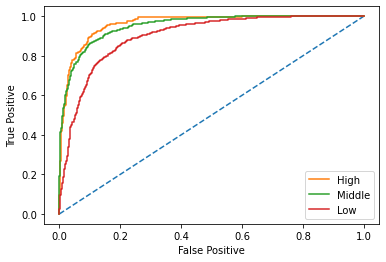

In [54]:
y_bin = pd.get_dummies(y_test)
y_pred_proba = logit.predict_proba(X_test)

plt.plot([0, 1], [0, 1], '--')
fpr1, tpr1, thresholds = metrics.roc_curve(y_bin['High'], y_pred_proba[:,0])
line0 = plt.plot(fpr1, tpr1, label='High')

fpr2, tpr2, thresholds = metrics.roc_curve(y_bin['Low'], y_pred_proba[:,1])
line1 = plt.plot(fpr2, tpr2, label='Middle')

fpr3, tpr3, thresholds = metrics.roc_curve(y_bin['Middle'], y_pred_proba[:,2])
line2 = plt.plot(fpr3, tpr3, label='Low')

plt.legend()
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()